# PySpark Logistic Regression Summary

Our full dataset file has around 9 million samples. When trying to run feature_generator, sklearn would error out since it was trying to keep all samples in memory.

For that, I started using pyspark to run our models.

All models were executed through notebooks in the *pyspark* folders. Each notebook in *pyspark* execute the same model but with a different sample size.

## Model

* Logistic Regression
* class_weight = 'balanced'

## Machine Specs:
* 2018 Mac Mini - 6 core

Docker Configuration:
* 9 CPUs
* 24 GB Ram
* 3 GB swap

Pyspark notebooks are executed via Docker images where Pyspark is installed

## Executing Docker container

```bash
cd ../pyspark
docker-compose up
```

Docker image will automatically rum jupyter lab. Once jupyter lab is up. Hit the following URL to access notebooks in the browser


```
http://localhost:8888/lab
```

# Conclusion

With Logistic Regression, performance of our model did improve quickly up to a point. Once we reach over 200k samples, there is a plateau where increasing sample size yielded minimal improvement to our model.

From 50k samples to 200k samples, our custom metric improved by around 9% going from .42 to .515




In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import json

import util.report_util as ru
import util.plot_util as pu

log = logging.getLogger(__name__)
logging.basicConfig(level=logging.WARN)
sns.set()
%matplotlib inline

DEBUG = False

REPORT_DIR = "../reports"
REPORT_FILE = "201911-pyspark-report.csv"


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vinceluk/anaconda3/envs/

In [2]:
report = pd.read_csv(f'{REPORT_DIR}/{REPORT_FILE}', quotechar="'")

# flatten out classification report so we can graph later
report = ru.convert_dnn_report_format(report)

In [3]:
report["eval_metric"] = report.classification_report.apply(lambda x: ru.calculate_metric(json.loads(x)))

# Model score stops improving after 2 million samples

* Minimal improvement in overall score after 200k samples
* Slopt of training time looks linear between 50k to 200k. Slope increases between 200k to 400k and another increase in slop after 400k samples

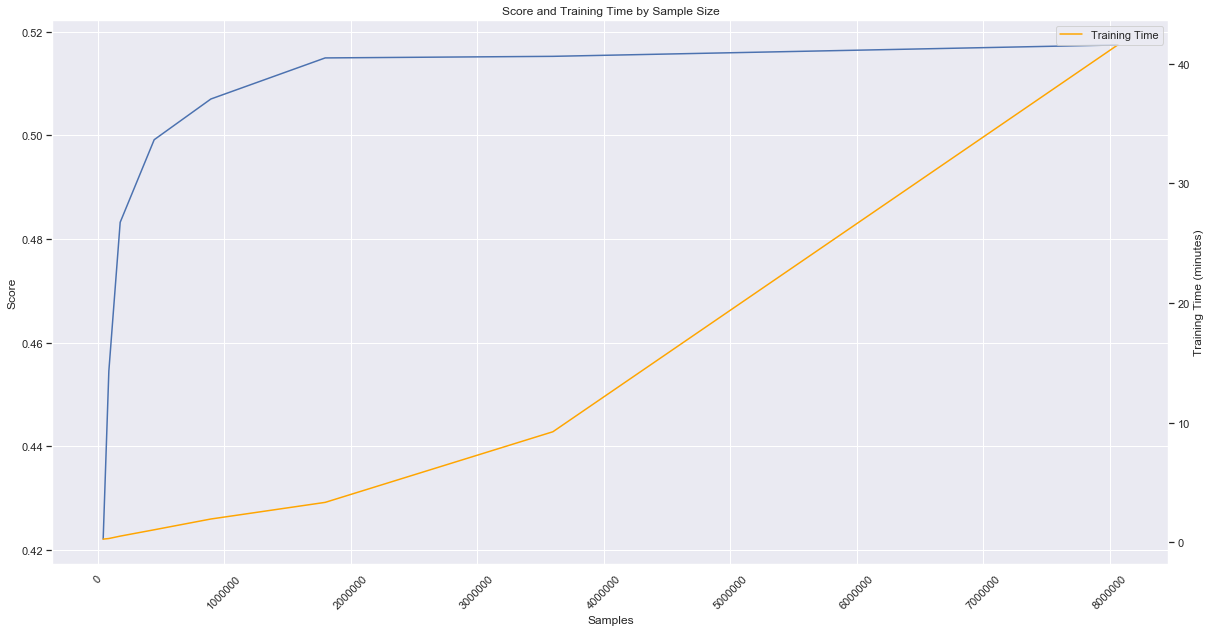

In [4]:
f, a = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(data=report, x="train_examples", y="eval_metric", sort=False)
_ = plt.xticks(rotation=45)
_ = plt.xlabel("Samples")
_ = plt.ylabel("Score")


a2 = a.twinx()
_ = sns.lineplot(data = report, x = "train_examples", y = "train_time_min", sort = False, ax=a2, label="Training Time", color="orange")
_ = plt.ylabel("Training Time (minutes)")
a2.grid(False)

_ = plt.title("Score and Training Time by Sample Size")


In [5]:
report[["train_examples", "eval_metric"]]

,train_examples,eval_metric
0,44726.0,0.422127
1,89544.0,0.454550
2,179168.0,0.483252
3,447989.0,0.499181
4,896004.0,0.507036
5,1799736.0,0.514962
6,3599433.0,0.515266
7,8064337.0,0.517467


# Classification Report Plot

* Recall
    * 1-star recall improves until 400k but doesn't change much after
    * 2-star increases until around 200k samples but doesn't change much after that
    * 3-star rating improved until around 400k samples
    * 4-star improves between 50k to 100k but minimal changes after
    * 5-star 
* Precision
    * 1-star precision improves until 200k samples but minimal changes after
    * 2-star precision increases slightly until around 900k samples
    * 3-star precision stays around the same after 200k samples
    * 4-star precision stays around the same from 400k samples on
    * 5-star precision is around the same for all sample sizes


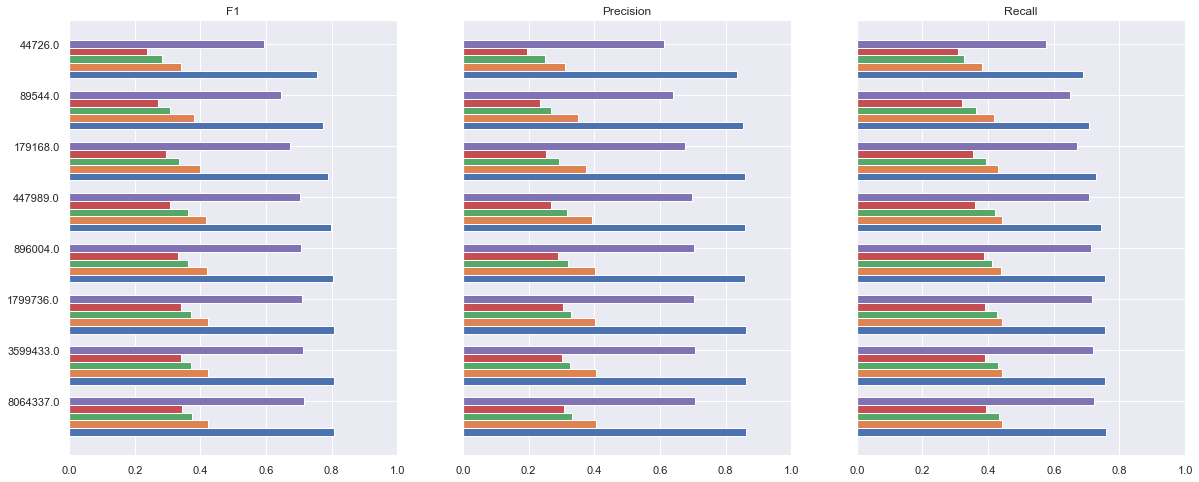

In [6]:
pu.plot_score_histograms(report, version=2, label="train_examples", sort=False)